# 国内独角兽公司数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

In [3]:
df = pd.read_csv('unicorn_china.csv')
df.head(3)

,Rank,Rank_range,Company,Company_eng,Valuation,Leader,Headquarter,Industry,Select Investors
0,1,→,蚂蚁金服,Ant Financial,10000,井贤栋,杭州,互联网金融,春华资本、中投海外、红杉资本
1,2,3↑,今日头条,Toutiao,5000,张一鸣,北京,文化娱乐,红杉资本、海纳亚洲、纪源资本
2,3,1↓,滴滴出行,Didi Chuxing,3000,程维,北京,互联网服务,腾讯、阿里巴巴、红杉资本、经纬中国


## 各地区独角兽公司数量和融资金额

In [24]:
count_se = df.groupby('Headquarter').count()['Company']
count_se

Headquarter
上海    42
北京    79
南京    10
台北     1
天津     2
广州     7
成都     1
无锡     1
杭州    18
武汉     1
深圳    15
绍兴     1
苏州     2
重庆     1
金华     1
长沙     1
青岛     1
香港     2
Name: Company, dtype: int64

In [25]:
val_se = df.groupby('Headquarter').sum()['Valuation']
val_se

Headquarter
上海     8240
北京    20570
南京     1760
台北       70
天津      500
广州      960
成都       70
无锡       70
杭州    12730
武汉      200
深圳     4190
绍兴      100
苏州      170
重庆      100
金华       70
长沙      100
青岛      100
香港      140
Name: Valuation, dtype: int64

In [79]:
newdf = pd.DataFrame({val_se.name: val_se.values, count_se.name: count_se.values})
newdf.index = val_se.index
newdf

,Valuation,Company
Headquarter,,
上海,8240,42
北京,20570,79
南京,1760,10
台北,70,1
天津,500,2
广州,960,7
成都,70,1
无锡,70,1
杭州,12730,18


Text(0, 0.5, '独角兽公司数/个 或 融资总和/100亿元')

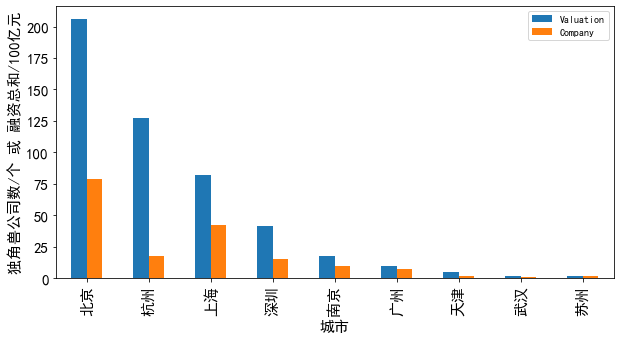

In [80]:
newdf['Valuation'] = newdf['Valuation'] / 100
count = len(newdf.index)
newdf.sort_values(ascending=False, by='Valuation').head(int(count/2)).plot.bar(figsize=(10, 5), fontsize=15)
plt.xlabel('城市', fontsize=15) # x轴名称
plt.ylabel('独角兽公司数/个 或 融资总和/100亿元', fontsize=15) # y轴名称

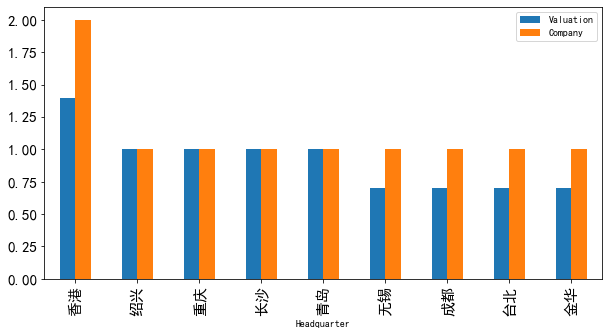

In [81]:
newdf.sort_values(ascending=False, by='Valuation').tail(int(count/2)).plot.bar(figsize=(10, 5), fontsize=15)

## 各投资企业投资总额

In [83]:
df['Select Investors'].str.split('、').head(3)

0        [春华资本, 中投海外, 红杉资本]
1        [红杉资本, 海纳亚洲, 纪源资本]
2    [腾讯, 阿里巴巴, 红杉资本, 经纬中国]
Name: Select Investors, dtype: object

In [85]:
newdf = df['Select Investors'].str.split('、', expand=True).apply(pd.Series)
newdf.head(3)

,0,1,2,3,4,5
0,春华资本,中投海外,红杉资本,None,None,None
1,红杉资本,海纳亚洲,纪源资本,None,None,None
2,腾讯,阿里巴巴,红杉资本,经纬中国,None,None


In [87]:
newdf.apply(pd.value_counts).fillna(0).head(3)

,0,1,2,3,4,5
,0.0,0.0,0.0,1.0,0.0,0.0
58同城,0.0,0.0,1.0,0.0,0.0,0.0
Accel,1.0,0.0,0.0,0.0,0.0,0.0


In [93]:
newdf2.sum(axis=1).astype('int').sort_values(ascending=False)

红杉资本      48
腾讯        30
IDG       19
经纬中国      17
启明创投      16
真格基金      15
高瓴资本      13
顺为资本      12
晨兴资本      12
阿里巴巴      11
高盛        10
君联资本       8
SIG        8
纪源资本       7
未透露        6
华平投资       6
GIC        5
北极光创投      5
DCM        5
蚂蚁金服       4
鼎晖投资       4
百度         4
云锋基金       4
今日资本       4
软银中国       4
新浪         4
贝塔斯曼       4
淡马锡        4
国投创新       3
天图资本       3
          ..
天府集团       1
大钲资本       1
大中投资       1
复星锐正资本     1
基石资本       1
慕华投资       1
新天域资本      1
海航资本       1
汇能金融       1
海航旅游       1
海纳亚洲       1
浙江金控       1
浙富控股       1
浙商创投       1
泛海控股       1
泛海投资       1
泛大西洋       1
汉能投资       1
正和岛基金      1
方和资本       1
松禾资本       1
曜为资本       1
暾澜资本       1
景林投资       1
易方达基金      1
易凯资本       1
明势资本       1
昆仑信托       1
方正和生       1
           1
Length: 224, dtype: int32

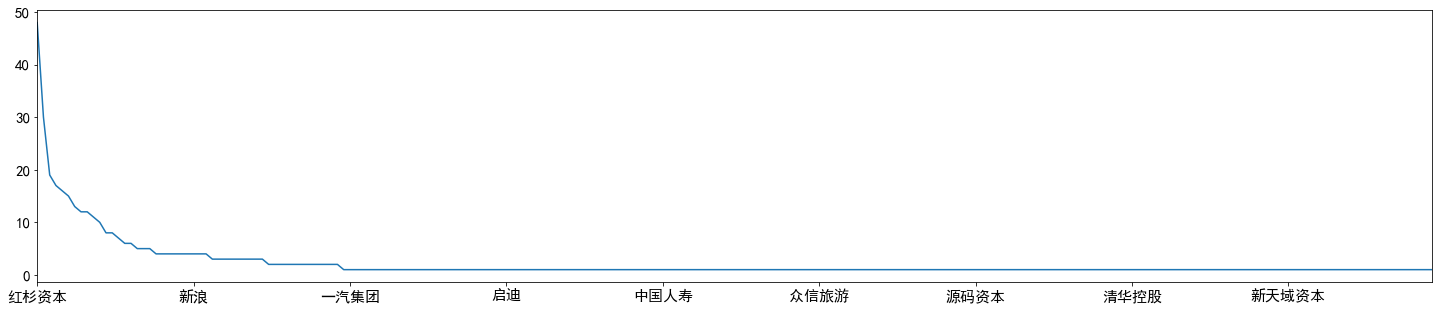

In [92]:
newdf2.sum(axis=1).astype('int').sort_values(ascending=False).plot(figsize=(25, 5), fontsize=15)